In [12]:
import pandas
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [13]:
import pyarrow.parquet as pq
import pandas as pd

In [14]:
# Đường dẫn đến tệp Parquet
parquet_file_path = "/home/hoanghainam/DE_internship/output.parquet"

# Đọc tệp Parquet thành bảng PyArrow
table = pq.read_table(parquet_file_path)

# Chuyển bảng PyArrow thành DataFrame pandas
df = table.to_pandas()


In [15]:
 %matplotlib inline

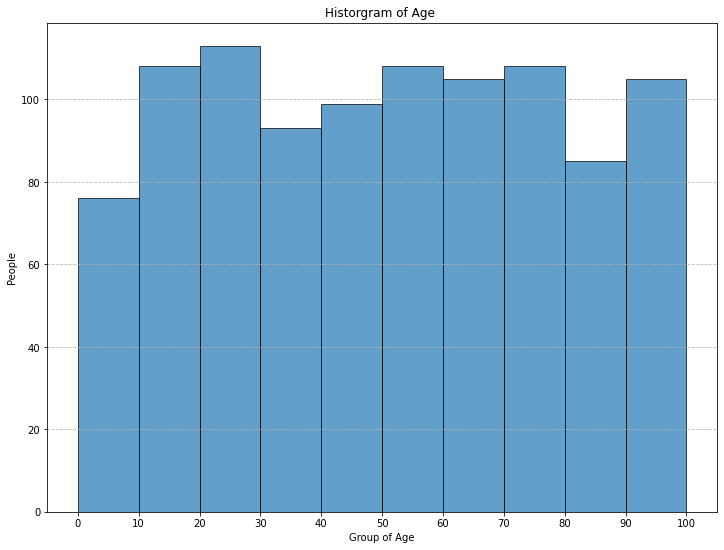

In [20]:
# Tạo các khoảng độ tuổi (0-10, 10-20, ...)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100]

# Tạo biểu đồ
plt.figure(figsize=(12, 9))
plt.hist(df['age'], bins=bins, edgecolor='k', alpha=0.7)
plt.xlabel('Group of Age')
plt.ylabel('People')
plt.title('Historgram of Age ')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.9)


Text(0.5, 1.0, 'Historgram of Gender')

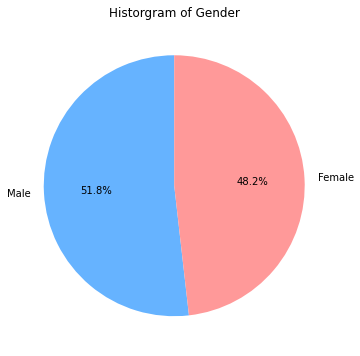

In [22]:
# Thống kê số lượng nam và nữ
gender_counts = df['Gender'].value_counts()

# Màu sắc cho biểu đồ tròn
colors = ['#66b3ff','#ff9999']  

# Labels cho biểu đồ tròn
labels = gender_counts.index

# Tạo biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Historgram of Gender')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0, 10]'),
  Text(1, 0, '(10, 20]'),
  Text(2, 0, '(20, 30]'),
  Text(3, 0, '(30, 40]'),
  Text(4, 0, '(40, 50]'),
  Text(5, 0, '(50, 60]'),
  Text(6, 0, '(60, 70]'),
  Text(7, 0, '(70, 80]'),
  Text(8, 0, '(80, 90]'),
  Text(9, 0, '(90, 100]')])

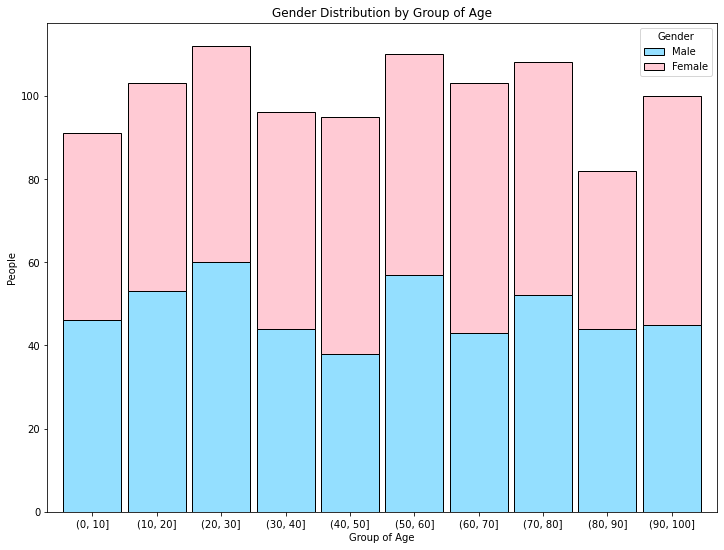

In [18]:
# Chia tuổi theo nhóm tuổi
df['Group of Age'] = pd.cut(df['age'], bins=bins)

# Tạo pivot table để thống kê giới tính theo nhóm tuổi
pivot_table = df.pivot_table(index='Group of Age', columns='Gender', aggfunc='size', fill_value=0)

# Vẽ biểu đồ cột stacked
plt.figure(figsize=(12, 9))
pivot_table.plot(kind='bar', stacked=True, edgecolor='k',color=['#94dfff', '#ffcad4'], ax=plt.gca(),width=0.9)
plt.xlabel('Group of Age')
plt.ylabel('People')
plt.title('Gender Distribution by Group of Age')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks(rotation=0)